In [ ]:
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

# Preprocess the dataset
# Code for preprocessing goes here


In [3]:
# Apply Standardization
scaler = StandardScaler()
df_std = scaler.fit_transform(df.drop('Outcome', axis=1))

# Apply PCA for feature extraction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std)

# Convert principal components to a dataframe
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

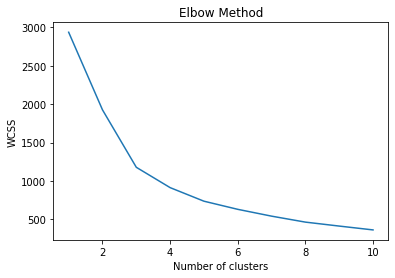

Accuracy of K-Means clustering algorithm: 67.45%


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Apply K-Means clustering algorithm and elbow method to classify diabetic and non-diabetic patients
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, select the number of clusters (e.g. 2)
n_clusters = 2

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(principal_df)
y_kmeans = kmeans.predict(principal_df)

# Evaluate the accuracy of the clustering
labels_true = df['Outcome']
accuracy = accuracy_score(labels_true, y_kmeans)
print("Accuracy of K-Means clustering algorithm: {:.2f}%".format(accuracy * 100))


In [15]:
# Get user input
input_features = []
for feature in df.columns[:-1]:
    value = input("Enter {} value: ".format(feature))
    input_features.append(float(value))

# Classify the user as diabetic or non-diabetic
user_df = pd.DataFrame([input_features], columns=df.columns[:-1])
user_std = scaler.transform(user_df)
user_pc = pca.transform(user_std)
user_label = kmeans.predict(user_pc)[0]

if user_label == 0:
    print("You are classified as a non-diabetic patient.")
else:
    print("You are classified as a type-2 diabetic patient.")


Enter Pregnancies value: 6
Enter Glucose value: 148
Enter BloodPressure value: 72
Enter SkinThickness value: 35
Enter Insulin value: 0
Enter BMI value: 33.6
Enter DiabetesPedigreeFunction value: 0
Enter Age value: 21
You are classified as a non-diabetic patient.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [14]:
if user_label == 0:
    # User is non-diabetic, recommend any food
    # Code for recommending any food goes here
    print("Wala kang diabetes")
else:
    # User is type-2 diabetic, recommend suitable foods
    # Code for recommending suitable foods goes here
    print("May diabetes ka")

Ang ganda ng bebe ko


# Ejected Test

In [ ]:
data = pd.read_csv('https://query.data.world/s/bn4zzv3dzqdf6nwlbvbpryimitkdey?dws=00000')

In [ ]:
data.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object to extract features from the 'long_desc' column
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit the vectorizer to the 'long_desc' column
features = vectorizer.fit_transform(data['Descrip'])

# Convert the features to a DataFrame
features_df = pd.DataFrame(features.toarray(), columns=vectorizer.vocabulary_)

# Concatenate the features DataFrame with the original data
data_with_features = pd.concat([data, features_df], axis=1)

# Print the first five rows of the data with features
print(data_with_features.head())

     ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  bannock  plains  indians  steller  applebee  kid  \
0       0.85  81.11  ...        0       0        0        0         0    0

In [ ]:
from sklearn.cluster import KMeans

# Fit a KMeans clustering model to the features
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(features_df)

# Assign each food to a cluster based on its features
data['cluster'] = kmeans.predict(features_df)

# Define a function to recommend foods based on the clusters
def recommend_foods(food_id, num_recommendations):
    cluster = data.loc[data['ID'] == food_id, 'cluster'].iloc[0]
    cluster_foods = data.loc[data['cluster'] == cluster]
    recommendations = cluster_foods.sort_values('cluster', ascending=False).head(num_recommendations)
    return recommendations

# Test the recommender system by recommending 5 foods similar to food ID 1102
recommendations = recommend_foods(90240, 5)
print(recommendations)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         ID                       FoodGroup                    ShortDescrip  \
116    1128          Dairy and Egg Products               EGG,WHL,CKD,FRIED   
4675  15225  Finfish and Shellfish Products  YELLOWTAIL,MXD SP,CKD,DRY HEAT   
4664  15214  Finfish and Shellfish Products    SEATROUT,MXD SP,CKD,DRY HEAT   
4665  15215  Finfish and Shellfish Products      SHAD,AMERICAN,CKD,DRY HEAT   
4666  15216  Finfish and Shellfish Products            SPOT,COOKED,DRY HEAT   

                                                Descrip CommonName MfgName  \
116                           Egg, whole, cooked, fried        NaN     NaN   
4675  Fish, yellowtail, mixed species, cooked, dry heat        NaN     NaN   
4664    Fish, seatrout, mixed species, cooked, dry heat        NaN     NaN   
4665             Fish, shad, american, cooked, dry heat        NaN     NaN   
4666                       Fish, spot, cooked, dry heat        NaN     NaN   

     ScientificName  Energy_kcal  Protein_g  Fat_g  ... 

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(features_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.08


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:


# Create a CountVectorizer object to extract features from the 'long_desc' column
vectorizer = TfidfVectorizer(stop_words='english', max_features=1250)

# Fit the vectorizer to the 'long_desc' column
features = vectorizer.fit_transform(data['Descrip'])

# Convert the features to a DataFrame
features_df = pd.DataFrame(features.toarray(), columns=vectorizer.vocabulary_)

# Concatenate the features DataFrame with the original data
data_with_features = pd.concat([data, features_df], axis=1)

# Print the first five rows of the data with features
print(data_with_features.head())

     ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  kid  menu  friday  platter  barrel  denny  carrabba  \
0       0.85  81.11  ...  0.0   0.0     0.0      0.0     0.0    0.0    

In [ ]:


# Fit a KMeans clustering model to the features
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(features_df)

# Assign each food to a cluster based on its features
data['cluster'] = kmeans.predict(features_df)

# Define a function to recommend foods based on the clusters
def recommend_foods(food_id, num_recommendations):
    cluster = data.loc[data['ID'] == food_id, 'cluster'].iloc[0]
    cluster_foods = data.loc[data['cluster'] == cluster]
    recommendations = cluster_foods.sort_values('cluster', ascending=False).head(num_recommendations)
    return recommendations

# Test the recommender system by recommending 5 foods similar to food ID 1102
recommendations = recommend_foods(90240, 5)
print(recommendations)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         ID               FoodGroup  \
0      1001  Dairy and Egg Products   
5817  18375          Baked Products   
5815  18373          Baked Products   
5814  18372          Baked Products   
5813  18371          Baked Products   

                                   ShortDescrip  \
0                              BUTTER,WITH SALT   
5817  LEAVENING AGENTS,YEAST,BAKER'S,ACTIVE DRY   
5815             LEAVENING AGENTS,CRM OF TARTAR   
5814               LEAVENING AGENTS,BAKING SODA   
5813     LEAVENING AGENTS,BAKING PDR,LOW-SODIUM   

                                           Descrip CommonName MfgName  \
0                                   Butter, salted        NaN     NaN   
5817  Leavening agents, yeast, baker's, active dry        NaN     NaN   
5815             Leavening agents, cream of tartar        NaN     NaN   
5814                 Leavening agents, baking soda        NaN     NaN   
5813   Leavening agents, baking powder, low-sodium        NaN     NaN   

     ScientificName

In [ ]:
# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(features_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.03


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_excel("ABBREV.xlsx")

# Remove columns that are not required
columns_to_drop = ['Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2', 'Refuse_Pct', 'Phosphorus_(mg)']
df.drop(columns_to_drop, axis=1, inplace=True)

# Drop rows with missing values
df.fillna(0, inplace=True)

# Convert categorical variables to numerical variables
df['Shrt_Desc'] = pd.to_numeric(df['Shrt_Desc'], errors='coerce')
df['GmWt_Desc1'] = pd.to_numeric(df['GmWt_Desc1'], errors='coerce')
df['GmWt_Desc2'] = pd.to_numeric(df['GmWt_Desc2'], errors='coerce')
df['Refuse_Pct'] = pd.to_numeric(df['Refuse_Pct'], errors='coerce')
df['Phosphorus_(mg)'] = pd.to_numeric(df['Phosphorus_(mg)'], errors='coerce')

df['Fiber_TD_(g)'] = pd.to_numeric(df['Fiber_TD_(g)'], errors='coerce')
df['FA_Sat_(g)'] = pd.to_numeric(df['FA_Sat_(g)'], errors='coerce')
df['Cholestrl_(mg)'] = pd.to_numeric(df['Cholestrl_(mg)'], errors='coerce')
df['Sodium_(mg)'] = pd.to_numeric(df['Sodium_(mg)'], errors='coerce')
df['Carbohydrt_(g)'] = pd.to_numeric(df['Carbohydrt_(g)'], errors='coerce')
df['Sugar_Tot_(g)'] = pd.to_numeric(df['Sugar_Tot_(g)'], errors='coerce')
df['Calcium_(mg)'] = pd.to_numeric(df['Calcium_(mg)'], errors='coerce')
df['Iron_(mg)'] = pd.to_numeric(df['Iron_(mg)'], errors='coerce')
df['Potassium_(mg)'] = pd.to_numeric(df['Potassium_(mg)'], errors='coerce')
df['Vit_A_IU'] = pd.to_numeric(df['Vit_A_IU'], errors='coerce')
df['Vit_C_(mg)'] = pd.to_numeric(df['Vit_C_(mg)'], errors='coerce')
df['Vit_E_(mg)'] = pd.to_numeric(df['Vit_E_(mg)'], errors='coerce')
df['Vit_D_IU'] = pd.to_numeric(df['Vit_D_IU'], errors='coerce')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_normalized = pd.DataFrame(scaled_data, columns=df.columns)

# Apply feature extraction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)

principal_df = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

# Apply elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(principal_df)
y_kmeans = kmeans.predict(principal_df)

# Combine Feature Extraction and K-Means Clustering
principal_df['cluster'] = y_kmeans

# Calculate the Silhouette Coefficient
from sklearn.metrics import silhouette_score

score = silhouette_score(principal_df.drop('cluster', axis=1), y_kmeans)
print("Silhouette Coefficient:", score)

# Feature Extraction and K-means clustering

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [43]:
# Load the dataset
df = pd.read_excel("ABBREV.xlsx")

In [44]:
# Preprocess the dataset
# Code for preprocessing goes here
df['GmWt_Desc1'] = pd.to_numeric(df['GmWt_Desc1'], errors='coerce')
df['GmWt_Desc2'] = pd.to_numeric(df['GmWt_Desc2'], errors='coerce')
df['Refuse_Pct'] = pd.to_numeric(df['Refuse_Pct'], errors='coerce')
df['Phosphorus_(mg)'] = pd.to_numeric(df['Phosphorus_(mg)'], errors='coerce')

df['Fiber_TD_(g)'] = pd.to_numeric(df['Fiber_TD_(g)'], errors='coerce')
df['FA_Sat_(g)'] = pd.to_numeric(df['FA_Sat_(g)'], errors='coerce')
df['Cholestrl_(mg)'] = pd.to_numeric(df['Cholestrl_(mg)'], errors='coerce')
df['Sodium_(mg)'] = pd.to_numeric(df['Sodium_(mg)'], errors='coerce')
df['Carbohydrt_(g)'] = pd.to_numeric(df['Carbohydrt_(g)'], errors='coerce')
df['Sugar_Tot_(g)'] = pd.to_numeric(df['Sugar_Tot_(g)'], errors='coerce')
df['Calcium_(mg)'] = pd.to_numeric(df['Calcium_(mg)'], errors='coerce')
df['Iron_(mg)'] = pd.to_numeric(df['Iron_(mg)'], errors='coerce')
df['Potassium_(mg)'] = pd.to_numeric(df['Potassium_(mg)'], errors='coerce')
df['Vit_A_IU'] = pd.to_numeric(df['Vit_A_IU'], errors='coerce')
df['Vit_C_(mg)'] = pd.to_numeric(df['Vit_C_(mg)'], errors='coerce')
df['Vit_E_(mg)'] = pd.to_numeric(df['Vit_E_(mg)'], errors='coerce')
df['Vit_D_IU'] = pd.to_numeric(df['Vit_D_IU'], errors='coerce')

df.fillna(0, inplace=True)

In [45]:
# Remove Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-45-f7f2e4adb4d0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [46]:
df.isnull().sum()

NDB_No               0
Shrt_Desc            0
Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(µg)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(µg)      0
Folic_Acid_(µg)      0
Food_Folate_(µg)     0
Folate_DFE_(µg)      0
Choline_Tot_ (mg)    0
Vit_B12_(µg)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(µg)         0
Alpha_Carot_(µg)     0
Beta_Carot_(µg)      0
Beta_Crypt_(µg)      0
Lycopene_(µg)        0
Lut+Zea_ (µg)        0
Vit_E_(mg)           0
Vit_D_µg             0
Vit_D_IU             0
Vit_K_(µg) 

In [47]:
# Apply Standardization
scaler = StandardScaler()
df_std = scaler.fit_transform(df.drop('Shrt_Desc', axis=1))

# Apply PCA for feature extraction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std)

# Convert principal components to a dataframe
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [48]:
# Get user input
calorie_req = input("Enter your calorie requirement: ")
food_allergy = input("Enter any food allergies: ")
#nutrient_req = input("Enter your preferred nutrient values (e.g. protein, fiber): ")

Enter your calorie requirement: 1000
Enter any food allergies: Butter


In [49]:
# Filter the dataset based on user input
filtered_df = df[(df['Energ_Kcal'] <= float(calorie_req)) & (~df['Shrt_Desc'].str.contains(food_allergy, na=False))
                  & (df['Sugar_Tot_(g)'] <= 10) & (df['Fiber_TD_(g)'] >= 5) & (df['Carbohydrt_(g)'] < 55)]
filtered_df = filtered_df.sort_values(by=['Protein_(g)'], ascending=False)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

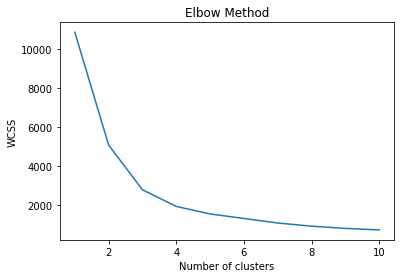

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
# Apply K-Means clustering algorithm and elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, select the number of clusters (e.g. 3)
n_clusters = 3

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(principal_df)
y_kmeans = kmeans.predict(principal_df)


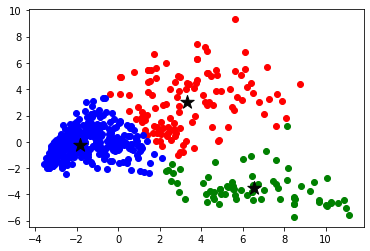

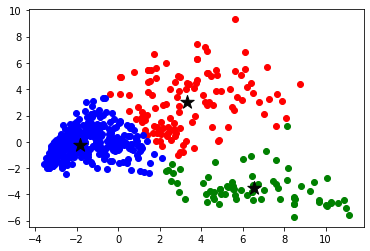

In [51]:
# Initialize centroids and colors
centroids = kmeans.cluster_centers_
colors = ['r', 'g', 'b']

# Plot initial centroids and data points
fig, ax = plt.subplots()
for i in range(n_clusters):
    ax.scatter(principal_df[y_kmeans == i]['PC1'], principal_df[y_kmeans == i]['PC2'], c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')

# Update centroids until convergence
while True:
    # Assign each data point to the nearest centroid
    old_centroids = centroids
    y_kmeans = kmeans.predict(principal_df)
    centroids = kmeans.cluster_centers_
    
    # Plot updated centroids and data points
    fig, ax = plt.subplots()
    for i in range(n_clusters):
        ax.scatter(principal_df[y_kmeans == i]['PC1'], principal_df[y_kmeans == i]['PC2'], c=colors[i])
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    
    # Check for convergence
    if (old_centroids == centroids).all():
        break

In [52]:
# Combine Feature Extraction and K-Means Clustering
principal_df['cluster'] = y_kmeans


In [57]:
# Get recommendations for the user
recommended_foods = []
for i in range(n_clusters):
    cluster_df = principal_df[principal_df['cluster'] == i]#.drop('cluster', axis=1)
    #cluster_df = pd.merge(cluster_df, df, left_index=True, right_index=True)
    #cluster_df = cluster_df.sort_values(by=['Protein_(g)'], ascending=False)
    index_list = cluster_df.index.tolist()
    cluster_food_df = df.iloc[index_list,:]
    #cluster_foods = filtered_df[filtered_df.index.isin(cluster_df.index)]
    if not cluster_food_df.empty:  # add check for empty DataFrame
      recommended_foods.append(cluster_food_df.iloc[0]['Shrt_Desc'])
    
print("Recommended foods for you:")
for food in recommended_foods:
    print("- " + food)


Recommended foods for you:
- YOGURT,CHOC,NONFAT MILK
- BABYFOOD,MEAT,PORK,STR
- CHEESE,COTTAGE,NONFAT,UNCRMD,DRY,LRG OR SML CURD


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

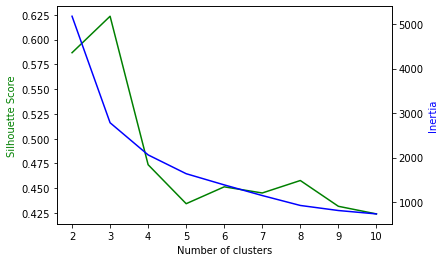

In [58]:
# Evaluate the system
from sklearn.metrics import silhouette_score

silhouette_scores = []
inertia_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(principal_df)
    labels = kmeans.predict(principal_df)
    silhouette_avg = silhouette_score(principal_df, labels)
    inertia = kmeans.inertia_
    silhouette_scores.append(silhouette_avg)
    inertia_scores.append(inertia)

# Plot evaluation metrics
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2, 11), silhouette_scores, 'g-', label='Silhouette Score')
ax2.plot(range(2, 11), inertia_scores, 'b-', label='Inertia')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette Score', color='g')
ax2.set_ylabel('Inertia', color='b')
plt.show()


In [59]:
#The feature extraction method that we used is the Principal Component Analysis
#The MATRIX that we used is called Principal Components Matrix
print(principal_df)

           PC1       PC2  cluster
0     0.896364 -1.017832        2
1     1.033056 -2.218180        2
2     0.063298 -0.520842        2
3    -0.857106  0.015182        2
4     0.600606 -2.184748        2
..         ...       ...      ...
657  10.260000 -4.566626        1
658   4.871189  0.171486        0
659   0.952355 -1.198835        2
660  10.975797 -5.047164        1
661   8.130655 -2.919043        1

[662 rows x 3 columns]


In [60]:
df['NDB_No'].head(20)

13     1014
15     1016
58     1060
61     1068
80     1088
112    1124
158    1184
161    1187
215    1256
226    1275
230    1281
296    2048
298    2050
299    2051
300    2052
301    2053
308    2068
309    2069
319    3007
325    3013
Name: NDB_No, dtype: int64